In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [56]:
'%''matplotlib' 'widget'

'%matplotlibwidget'

In [57]:
df = pd.read_csv("loan.csv")

In [58]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [60]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [62]:
df.dtypes == 'object'

Gender                True
Married               True
Dependents           False
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [63]:
df['Gender'].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

In [64]:
df['Education'].value_counts()

Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64

In [65]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    16
100.0    15
187.0    12
128.0    11
         ..
72.0      1
240.0     1
214.0     1
59.0      1
253.0     1
Name: count, Length: 199, dtype: int64

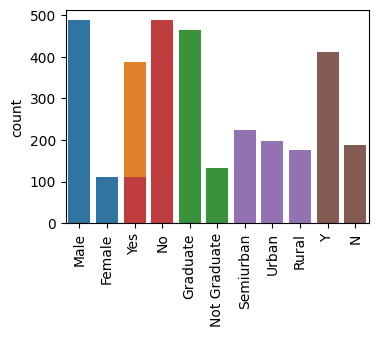

In [66]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.close()
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index = 1

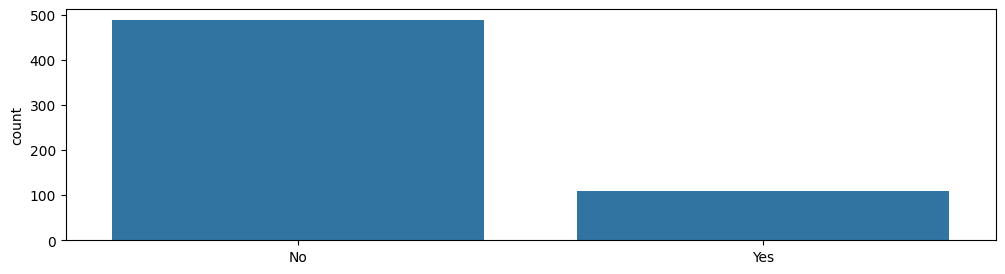

In [67]:
plt.close()
plt.figure(figsize=(12,3))
sns.barplot(x=list(df['Self_Employed'].value_counts().index), y=df['Self_Employed'].value_counts())
plt.show()

In [68]:
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
    df[col] = label_encoder.fit_transform(df[col])

In [69]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [70]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Married']= label_encoder.fit_transform(df['Married'])
df['Education']= label_encoder.fit_transform(df['Education'])
df['Self_Employed']= label_encoder.fit_transform(df['Self_Employed'])
df['Property_Area']= label_encoder.fit_transform(df['Property_Area'])
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


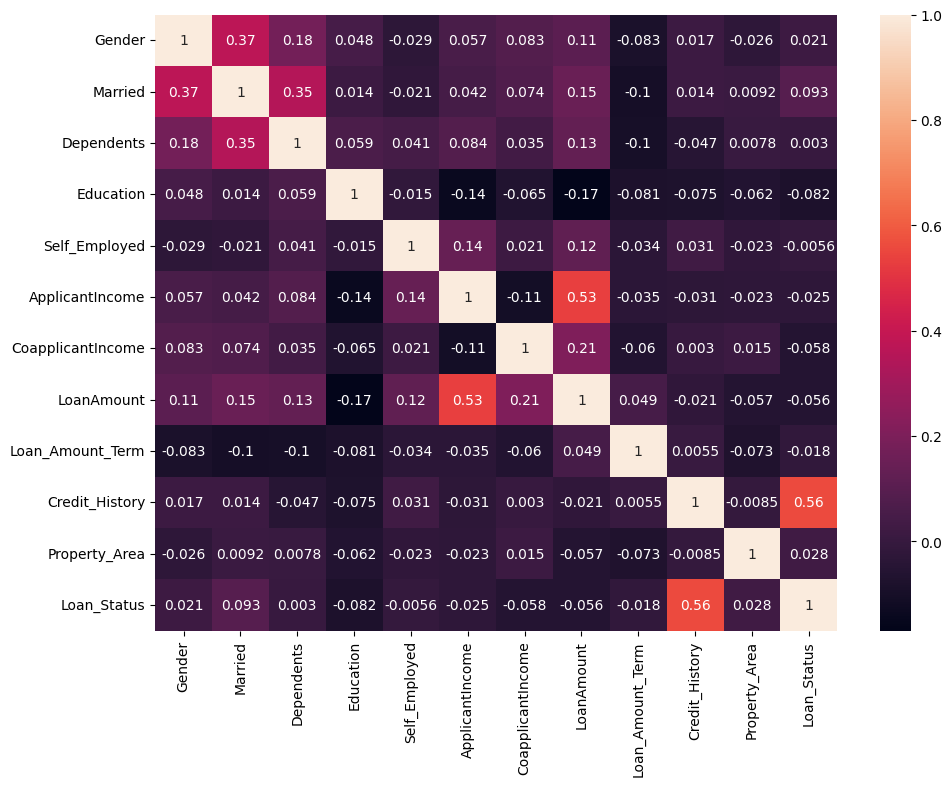

In [72]:
plt.close()
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [73]:
df.isna().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
df.isnull().sum()

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
df['Dependents'].mean()

0.7559726962457338

In [77]:
df['LoanAmount'].mean()

144.9688041594454

In [78]:
df['Credit_History'].mean()

0.843351548269581

In [79]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mean())

df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [81]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']
x.shape,y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((478, 11), (120, 11), (478,), (120,))

In [82]:
model = LogisticRegression()

In [83]:
model.max_iter=10000
model.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [84]:
y_pred = model.predict(x_train)

In [85]:
metrics.accuracy_score(y_train,y_pred)

0.805439330543933

In [86]:
y_pred = model.predict(x_test)

In [87]:
metrics.accuracy_score(y_test,y_pred)

0.825

In [89]:
print(metrics.accuracy_score(y_test,y_pred)*100,"%")

82.5 %
